In [20]:
from pyspark.sql import SparkSession

# Spark session & context
spark = (SparkSession
         .builder
         .master('local')
         .appName('wiki-test-dataviz')
         .getOrCreate())
sc = spark.sparkContext

In [21]:
# Read parquet
df_parquet = (
    spark
    .read
    .format("parquet")
    .load("/home/jovyan/work/data-lake/wiki-changes")
)

In [22]:
from pyspark.sql.functions import col

df_group = (df_parquet
 .where((col("user")=="SuccuBot") & (col("change_timestamp").between("2020-07-26 09:00:00","2020-07-26 09:10:00")))
 .groupBy(
     col("user"))
 .count())

In [23]:
df_group.printSchema()

root
 |-- user: string (nullable = true)
 |-- count: long (nullable = false)



In [24]:
df_group.show(truncate=False)

+--------+-----+
|user    |count|
+--------+-----+
|SuccuBot|58834|
+--------+-----+



### Count in update mode:
#### Need to sum the update batches. The count lines of SuccuBot user is the same as sum the micro batch counts for update mode

trash:///Screenshot%20from%202020-07-25%2011-47-54.png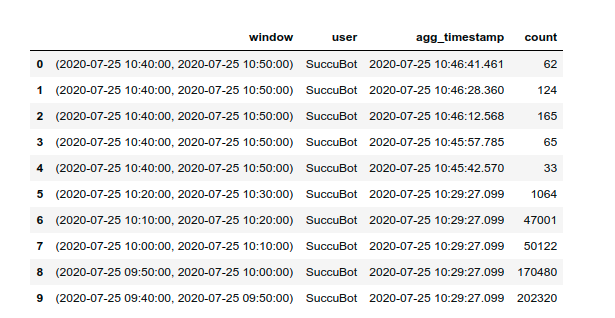